## 环境准备

### 安装geopandas和esda

```shell
pip3 install geopandas
pip3 install esda

```

## 数据预处理

### 疫情数据预处理

In [35]:
import csv

file_read = open('全球新冠疫情数据/COVID_ALL.csv', 'r')
with file_read:
    reader = csv.reader(file_read)
    for row in reader:
        if(len(row)!=0):
            if(row[0]=='2020-01-27'):
                if(row[1]=='中国'):
                    if(row[3]!=''):
                        if(row[5]!=''):
                            with open('全球新冠疫情数据/COVID_ALL_PREDEAL.csv', 'a') as file_write:
                                file_write.write(row[3] + ',' + row[5] + ',' + row[7] + '\n')
file_read = open('全球新冠疫情数据/COVID_ALL_PREDEAL.csv', 'r')
with file_read:
    reader = csv.reader(file_read)
    for row in reader:
        if(row[0]=='湖南省'):
            print(row)

['湖南省', '长沙市', '24']
['湖南省', '株洲市', '7']
['湖南省', '湘潭市', '6']
['湖南省', '衡阳市', '7']
['湖南省', '邵阳市', '11']
['湖南省', '岳阳市', '17']
['湖南省', '常德市', '19']
['湖南省', '益阳市', '10']
['湖南省', '郴州市', '7']
['湖南省', '永州市', '7']
['湖南省', '怀化市', '16']
['湖南省', '娄底市', '9']
['湖南省', '湘西土家族苗族自治州', '3']


### 矢量地图数据处理

,省代码,省,市代码,市,类型,geometry
0,110000,北京市,110000,北京市,直辖市,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
1,120000,天津市,120000,天津市,直辖市,"POLYGON ((117.44383 40.25101, 117.45611 40.246..."
2,130000,河北省,130100,石家庄市,地级市,"POLYGON ((113.82422 38.75805, 113.83120 38.748..."
3,130000,河北省,130200,唐山市,地级市,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ..."
4,130000,河北省,130300,秦皇岛市,地级市,"POLYGON ((119.15209 40.61280, 119.15165 40.609..."


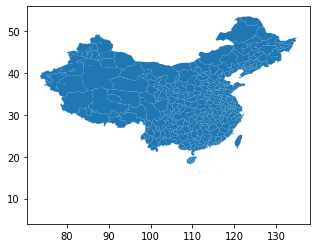

In [100]:
import geopandas

shapefile = geopandas.read_file('中国市级矢量地图/市.shp')
shapefile.plot()
shapefile.head()

In [101]:
shapefile.set_index("市",inplace=True)
shapefile.head()

,省代码,省,市代码,类型,geometry
市,,,,,
北京市,110000,北京市,110000,直辖市,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
天津市,120000,天津市,120000,直辖市,"POLYGON ((117.44383 40.25101, 117.45611 40.246..."
石家庄市,130000,河北省,130100,地级市,"POLYGON ((113.82422 38.75805, 113.83120 38.748..."
唐山市,130000,河北省,130200,地级市,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ..."
秦皇岛市,130000,河北省,130300,地级市,"POLYGON ((119.15209 40.61280, 119.15165 40.609..."


In [102]:
shapefile.insert(shapefile.shape[1], '确诊', 0)
shapefile.head()

file_read = open('全球新冠疫情数据/COVID_ALL_PREDEAL.csv', 'r')
with file_read:
    reader = csv.reader(file_read)
    for row in reader:
        shapefile.loc[row[1],'确诊']=int(row[2])
        
shapefile.head()

,省代码,省,市代码,类型,geometry,确诊
市,,,,,,
北京市,110000.0,北京市,110000.0,直辖市,"POLYGON ((116.67527 41.04010, 116.67616 41.040...",0.0
天津市,120000.0,天津市,120000.0,直辖市,"POLYGON ((117.44383 40.25101, 117.45611 40.246...",0.0
石家庄市,130000.0,河北省,130100.0,地级市,"POLYGON ((113.82422 38.75805, 113.83120 38.748...",9.0
唐山市,130000.0,河北省,130200.0,地级市,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ...",1.0
秦皇岛市,130000.0,河北省,130300.0,地级市,"POLYGON ((119.15209 40.61280, 119.15165 40.609...",0.0


In [68]:
shapefile.to_file('中国市级矢量地图/市_PREDEAL.shp',encoding='utf-8')

## 分布模式分析

### 全局Moran I 指数

In [70]:
import esda  
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
# import contextily as ctx
from pylab import figure, scatter, show

%matplotlib inline

In [108]:
gdf = gpd.read_file("中国市级矢量地图/市_PREDEAL.shp")

In [109]:
gdf.columns.values  #字段名

array(['市', '省代码', '省', '市代码', '类型', '确诊', 'geometry'], dtype=object)

In [110]:
gdf.head()

,市,省代码,省,市代码,类型,确诊,geometry
0,北京市,110000.0,北京市,110000.0,直辖市,0.0,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
1,天津市,120000.0,天津市,120000.0,直辖市,0.0,"POLYGON ((117.44383 40.25101, 117.45611 40.246..."
2,石家庄市,130000.0,河北省,130100.0,地级市,9.0,"POLYGON ((113.82422 38.75805, 113.83120 38.748..."
3,唐山市,130000.0,河北省,130200.0,地级市,1.0,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ..."
4,秦皇岛市,130000.0,河北省,130300.0,地级市,0.0,"POLYGON ((119.15209 40.61280, 119.15165 40.609..."


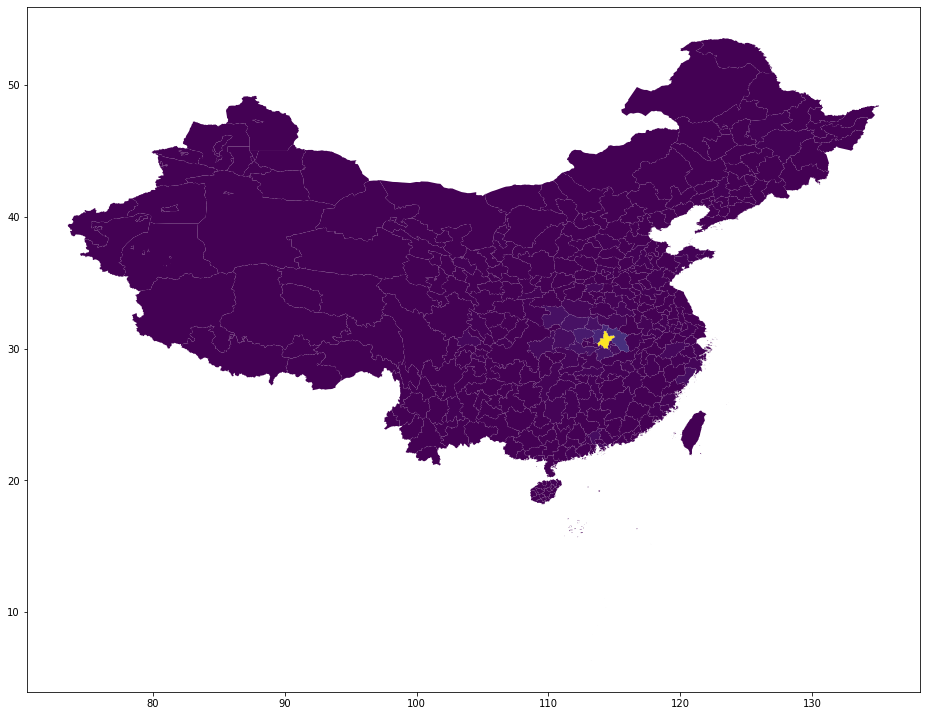

In [111]:
ax=gdf.plot(figsize=[16,20],column="确诊")

In [114]:
df = gdf
wq =  lps.weights.Queen.from_dataframe(df)# 使用Quuen式邻接矩阵
wq.transform = 'r' # 标准化矩阵

/root/.conda/envs/jupyter/lib/python3.9/site-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/root/.conda/envs/jupyter/lib/python3.9/site-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))


('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 236, ' is an island (no neighbors)')
('WARNING: ', 368, ' is an island (no neighbors)')


/root/.conda/envs/jupyter/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 3 islands with ids: 95, 236, 368.
  warnings.warn(message)


In [115]:
centroids = gdf.geometry.centroid # 计算多边形几何中心


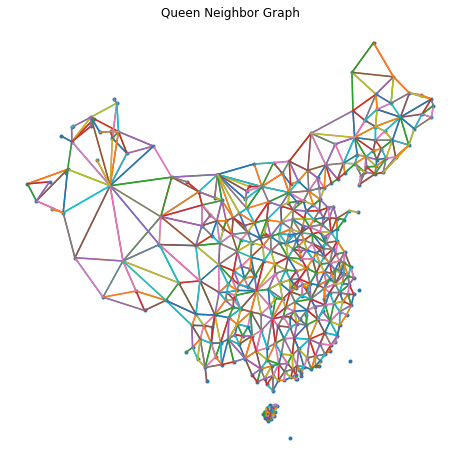

In [116]:
fig = figure(figsize=(8,8))

plt.plot(centroids.x, centroids.y,'.')
for k,neighs in wq.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment.x, segment.y, '-')
plt.title('Queen Neighbor Graph')
plt.axis('off')
plt.show()

In [117]:
wr =  lps.weights.Rook.from_dataframe(df) # 使用Rook式邻接矩阵

/root/.conda/envs/jupyter/lib/python3.9/site-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/root/.conda/envs/jupyter/lib/python3.9/site-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))
/root/.conda/envs/jupyter/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 3 islands with ids: 95, 236, 368.
  warnings.warn(message)


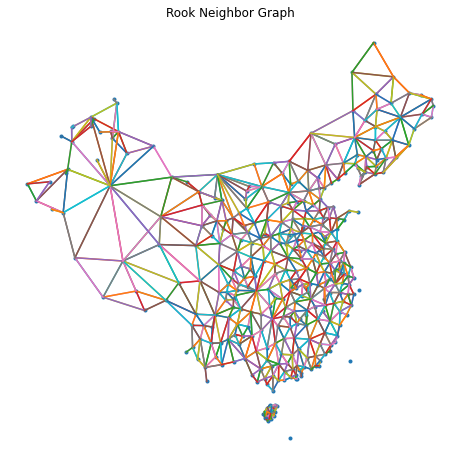

In [118]:
fig = figure(figsize=(8,8))

plt.plot(centroids.x, centroids.y,'.')
for k,neighs in wr.neighbors.items():
    #print(k,neighs)
    origin = centroids[k]
    for neigh in neighs:
        segment = centroids[[k,neigh]]
        plt.plot(segment.x, segment.y, '-')
plt.title('Rook Neighbor Graph')
plt.axis('off')
plt.show()

In [120]:
y=gdf["确诊"]
mi = esda.moran.Moran(y, wq)

print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)

Moran's I 值为： 0.13508057388474565
随机分布假设下Z检验值为： 12.902329505729087
随机分布假设下Z检验的P值为： 0.0
正态分布假设下Z检验值为： 4.081869732670478
正态分布假设下Z检验的P值为： 4.4674836379599014e-05


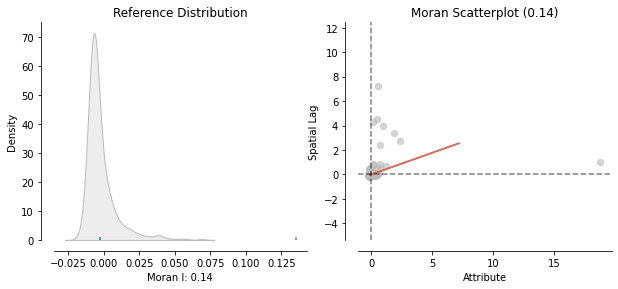

In [121]:
from splot.esda import plot_moran

plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()

### 全局Getis G 指数